<a href="https://colab.research.google.com/github/bryaanabraham/Wandering_Guardian/blob/i/multiple_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd

df = pd.read_csv("go_track_trackspoints.csv")
df.head(10)

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21


In [68]:
df.dropna(how='all', inplace=True)
df = df[df['track_id'] == 1]
df.head(10)

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21


In [69]:
import math

def gps_to_cartesian(floatlatitude, longitude):
    # Radius of the Earth in meters
    R = 6371000

    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(floatlatitude)
    lon_rad = math.radians(longitude)

    # Convert latitude and longitude to Cartesian coordinates
    x = R * math.cos(lat_rad) * math.cos(lon_rad)
    y = R * math.cos(lat_rad) * math.sin(lon_rad)

    return x, y

# Apply the gps_to_cartesian function to each row of the DataFrame
df['x'], df['y'] = zip(*df.apply(lambda row: gps_to_cartesian(row['latitude'], row['longitude']), axis=1))

# Display the modified DataFrame
df.head(10)


,id,latitude,longitude,track_id,time,x,y
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,4.991524e+06,-3.769960e+06
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37,4.991524e+06,-3.769960e+06
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42,4.991523e+06,-3.769962e+06
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47,4.991519e+06,-3.769970e+06
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53,4.991521e+06,-3.769977e+06
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59,4.991531e+06,-3.769978e+06
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04,4.991551e+06,-3.769959e+06
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10,4.991588e+06,-3.769906e+06
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15,4.991617e+06,-3.769860e+06
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21,4.991656e+06,-3.769797e+06


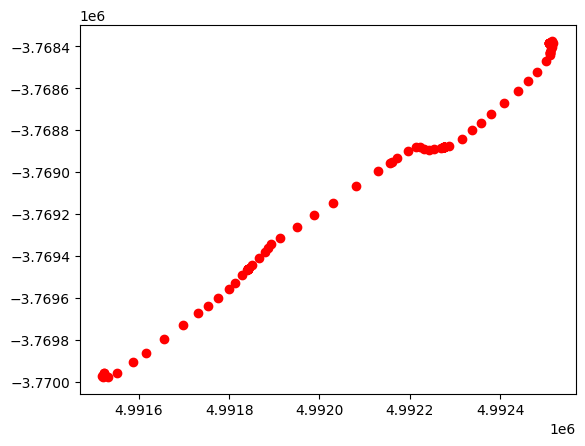

In [70]:
# gps to cartesian

import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'], label='GPS Data', color='red')


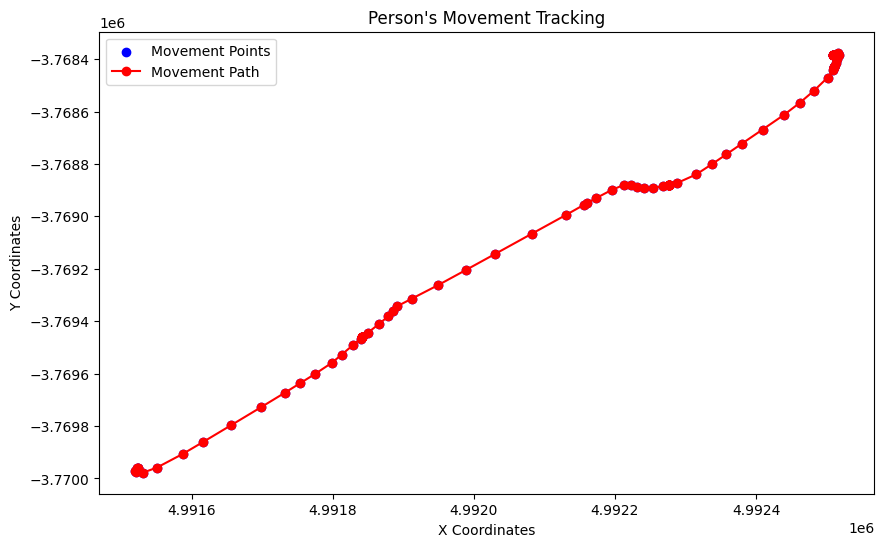

In [71]:
plt.figure(figsize=(10, 6))

# Plot the points
plt.scatter(df['x'], df['y'], label='Movement Points', color='blue')

# Connect the points with lines
plt.plot(df['x'], df['y'], linestyle='-', marker='o', color='red', label='Movement Path')

# Set labels and title
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Person\'s Movement Tracking')

# Show legend
plt.legend()

# Show the plot
plt.show()

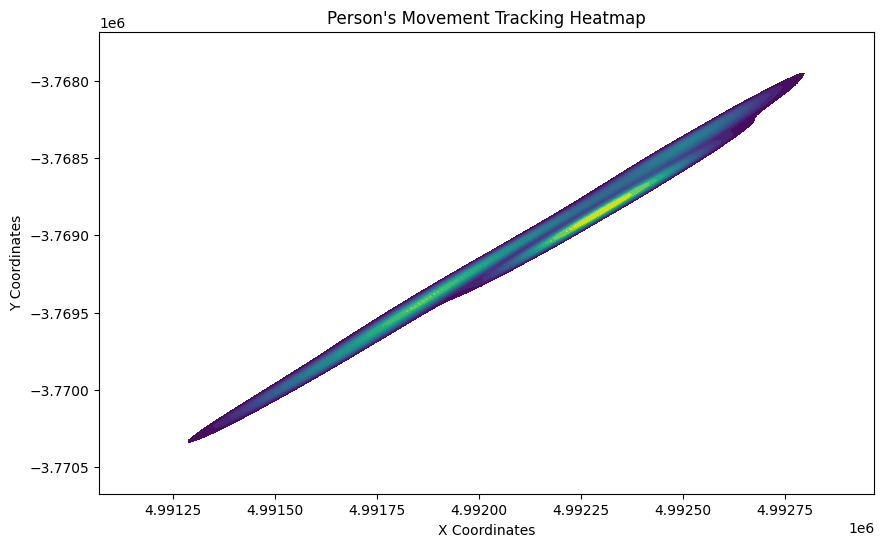

In [72]:
#cartesian coordinates, heatmap plotting

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='x', y='y', fill=True, cmap='viridis', levels=20)

# Set labels and title
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Person\'s Movement Tracking Heatmap')

# Show the plot
plt.show()


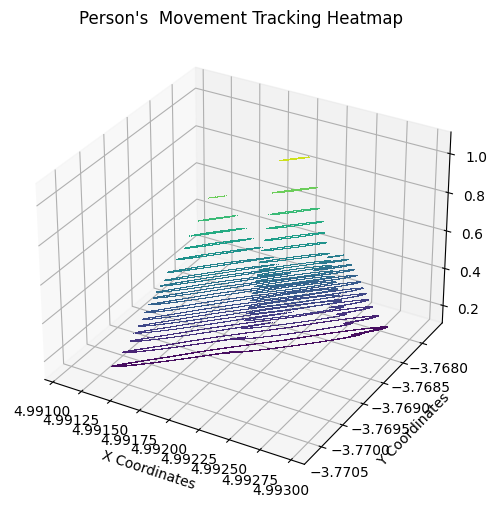

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 3D heatmap using Seaborn
plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
sns.kdeplot(data=df, x='x', y='y', fill=True, cmap='viridis', levels=20, ax=ax)

# Set labels and title
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
plt.title('Person\'s  Movement Tracking Heatmap')

# Show the plot
plt.show()



In [74]:
df.head(10)

,id,latitude,longitude,track_id,time,x,y
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,4.991524e+06,-3.769960e+06
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37,4.991524e+06,-3.769960e+06
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42,4.991523e+06,-3.769962e+06
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47,4.991519e+06,-3.769970e+06
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53,4.991521e+06,-3.769977e+06
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59,4.991531e+06,-3.769978e+06
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04,4.991551e+06,-3.769959e+06
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10,4.991588e+06,-3.769906e+06
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15,4.991617e+06,-3.769860e+06
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21,4.991656e+06,-3.769797e+06


In [76]:
import math

def gps_to_cartesian(latitude, longitude):
    # Radius of the Earth in meters
    R = 6371000

    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(latitude)
    lon_rad = math.radians(longitude)

    # Convert latitude and longitude to Cartesian coordinates
    x = R * math.cos(lat_rad) * math.cos(lon_rad)
    y = R * math.cos(lat_rad) * math.sin(lon_rad)
    z = R * math.sin(lat_rad)

    return x, y, z

# Apply the gps_to_cartesian function to each row of the DataFrame
df[['x', 'y', 'z']] = df.apply(lambda row: pd.Series(gps_to_cartesian(row['latitude'], row['longitude'])), axis=1)

# Display the modified DataFrame
df.head(10)


,id,latitude,longitude,track_id,time,x,y,z
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32,4.991524e+06,-3.769960e+06,-1.209022e+06
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37,4.991524e+06,-3.769960e+06,-1.209022e+06
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42,4.991523e+06,-3.769962e+06,-1.209021e+06
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47,4.991519e+06,-3.769970e+06,-1.209008e+06
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53,4.991521e+06,-3.769977e+06,-1.208978e+06
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59,4.991531e+06,-3.769978e+06,-1.208935e+06
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04,4.991551e+06,-3.769959e+06,-1.208914e+06
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10,4.991588e+06,-3.769906e+06,-1.208925e+06
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15,4.991617e+06,-3.769860e+06,-1.208949e+06
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21,4.991656e+06,-3.769797e+06,-1.208984e+06


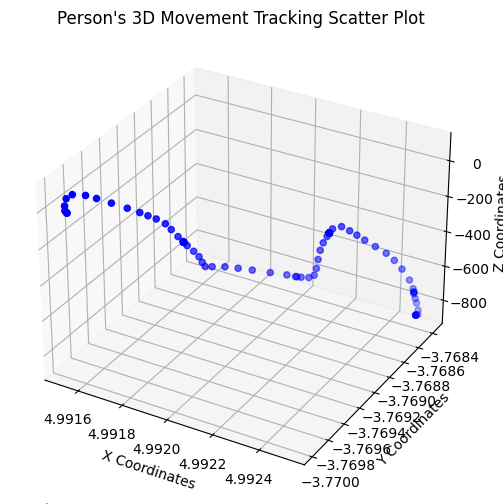

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame with the relevant coordinates and 'x', 'y', 'z' columns

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['x'], df['y'], df['z'], c='blue', marker='o', label='Movement Points')

# Set labels and title
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Z Coordinates')
plt.title('Person\'s 3D Movement Tracking Scatter Plot')

# Show the plot
plt.show()


<ipython-input-78-9823c72e0df2>:15: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x, y])


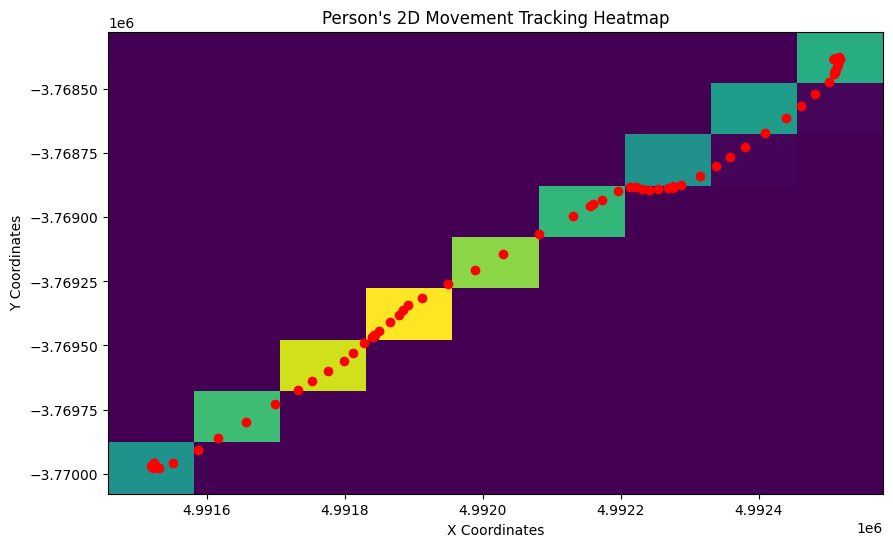

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

# Assuming df is your DataFrame with the relevant coordinates and 'x', 'y', 'z' columns

# Create a 2D heatmap
fig, ax = plt.subplots(figsize=(10, 6))
x = df['x']
y = df['y']
z = df['z']

# Calculate the kernel density estimate
k = kde.gaussian_kde([x, y])
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j, y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Plot the heatmap
ax.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap='viridis')

# Scatter plot the points on top
ax.scatter(x, y, c='red', marker='o', label='Movement Points')

# Set labels and title
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
plt.title('Person\'s 2D Movement Tracking Heatmap')

# Show the plot
plt.show()


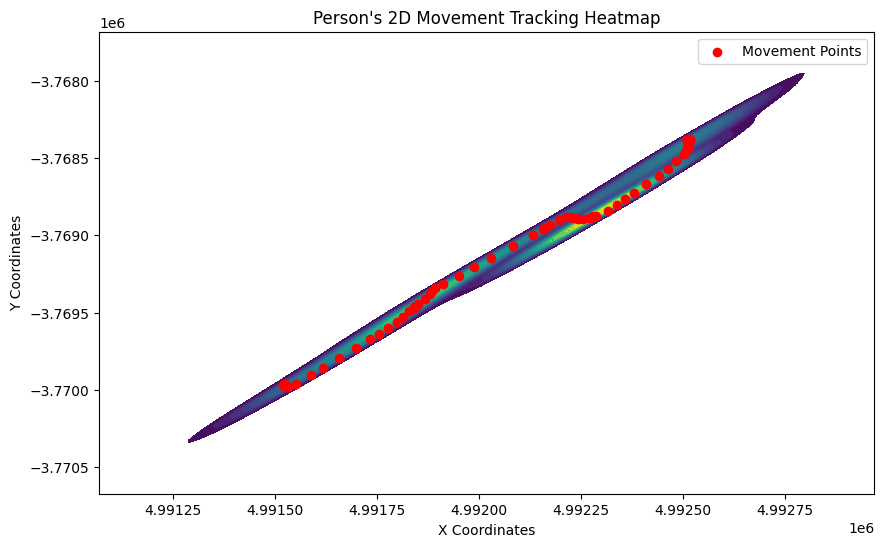

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the relevant coordinates and 'x', 'y', 'z' columns

# Create a 2D heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='x', y='y', fill=True, cmap='viridis', levels=20)

# Scatter plot the points on top
plt.scatter(df['x'], df['y'], c='red', marker='o', label='Movement Points')

# Set labels and title
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Person\'s 2D Movement Tracking Heatmap')

# Show the legend
plt.legend()

# Show the plot
plt.show()


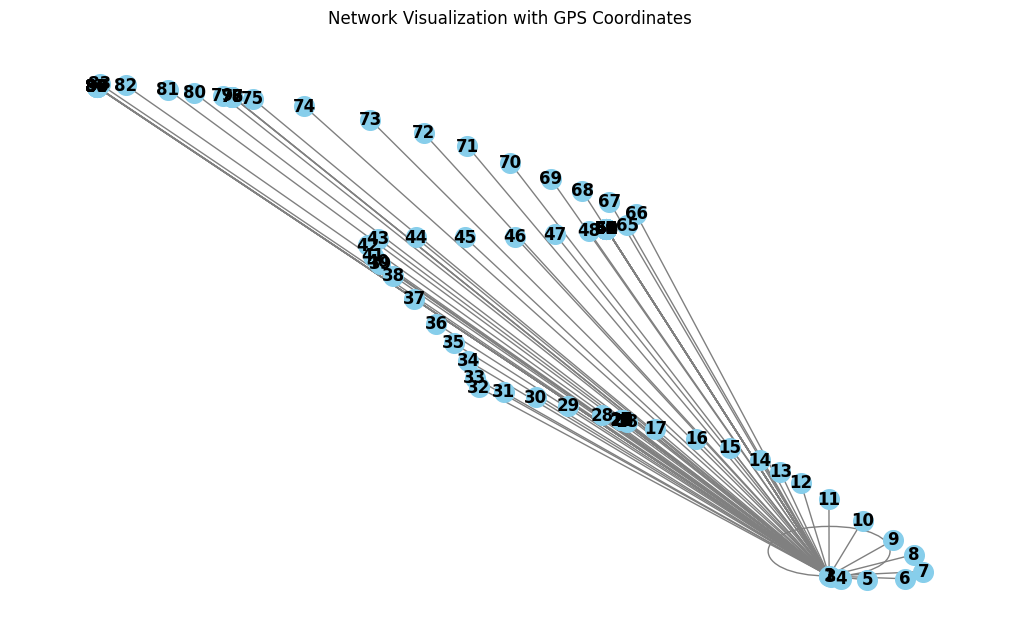

In [80]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the relevant data
# Columns: 'latitude', 'longitude', 'node_id', 'connection_id'

# Create a graph using NetworkX
G = nx.Graph()

# Iterate through DataFrame rows to add nodes with GPS coordinates
for _, row in df.iterrows():
    node_id = row['id']
    latitude = row['latitude']
    longitude = row['longitude']
    G.add_node(node_id, pos=(latitude, longitude))  # 'pos' attribute for node positions

# Add edges based on connections in the DataFrame
G.add_edges_from(df[['id', 'track_id']].values)

# Draw the network graph with GPS coordinates
plt.figure(figsize=(10, 6))
pos = nx.get_node_attributes(G, 'pos')  # Retrieve node positions
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=200, node_color='skyblue', edge_color='gray')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Network Visualization with GPS Coordinates')

# Show the plot
plt.show()


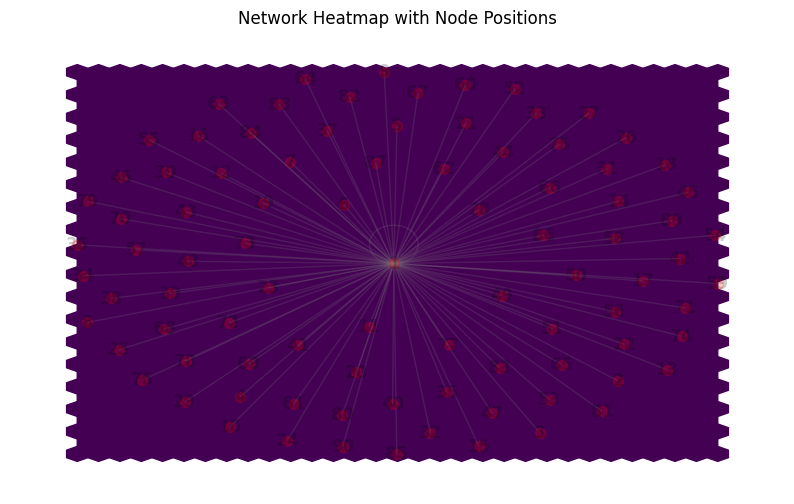

In [81]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the relevant data
# Columns: 'latitude', 'longitude', 'node_id', 'connection_id'

# Create a graph using NetworkX
G = nx.Graph()

# Iterate through DataFrame rows to add nodes with GPS coordinates
for _, row in df.iterrows():
    node_id = row['track_id']
    latitude = row['latitude']
    longitude = row['longitude']
    G.add_node(node_id, pos=(latitude, longitude))  # 'pos' attribute for node positions

# Add edges based on connections in the DataFrame
G.add_edges_from(df[['track_id','id']].values)

# Calculate node positions using a layout algorithm (e.g., spring_layout)
pos = nx.spring_layout(G)

# Get node coordinates for plotting
node_coords = np.array(list(pos.values()))

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.hexbin(node_coords[:, 0], node_coords[:, 1], gridsize=30, cmap='viridis', bins='log')

# Draw the network graph on top
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=50, node_color='red', edge_color='gray', alpha=0.2)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Network Heatmap with Node Positions')

# Show the plot
plt.show()
